In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:

import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt


from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling2D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
    Activation
)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers, optimizers
import os
import pandas as pd

In [5]:
traindf=pd.read_csv("/content/gdrive/MyDrive/Atelier_MFCC_unified_length/training_mfcc_unified_length_Nosilence.csv",dtype=str)


In [6]:
traindf

,name,gender,age,status,filename,category,rand,cl
0,non-cough-sound_0.mp3.wav.png,<undefined>,NaN,<undefined>,1-100032-A-0.wav.png,dog,0.290557931,noncough
1,non-cough-sound_1.mp3.wav.png,<undefined>,NaN,<undefined>,1-100038-A-14.wav.png,chirping_birds,0.91698343,noncough
2,non-cough-sound_10.mp3.wav.png,<undefined>,NaN,<undefined>,1-103999-A-30.wav.png,door_wood_knock,0.133555922,noncough
3,non-cough-sound_100.mp3.wav.png,<undefined>,NaN,<undefined>,1-208757-D-2.wav.png,pig,0.900461917,noncough
4,non-cough-sound_1000.mp3.wav.png,<undefined>,NaN,<undefined>,3-154758-A-44.wav.png,engine,0.072888949,noncough
...,...,...,...,...,...,...,...,...
3123,sound_1140.mp3.wav.png,female,NaN,healthy,NaN,NaN,0.052522328,cough
3124,sound_11400.mp3.wav.png,male,69,COVID-19,NaN,NaN,0.157766699,cough
3125,sound_11401.mp3.wav.png,male,15,COVID-19,NaN,NaN,0.440434612,cough
3126,sound_11402.mp3.wav.png,male,22,symptomatic,NaN,NaN,0.409901994,cough


In [8]:
traindf=pd.read_csv("/content/gdrive/MyDrive/Atelier_MFCC_unified_length/training_mfcc_unified_length_Nosilence.csv",dtype=str)

#traindf["name"]=traindf["name"].apply(append_ext)

#traindf["cl"]=traindf["cl"].apply(append_ext)

In [7]:
validationdf=pd.read_csv("/content/gdrive/MyDrive/Atelier_MFCC_unified_length/validation_mfcc_unified_length_Nosilence.csv",dtype=str)

#validationdf["name"]=validationdf["name"].apply(append_ext)

#validationdf["cl"]=validationdf["cl"].apply(append_ext)

In [8]:
testdf=pd.read_csv("/content/gdrive/MyDrive/Atelier_MFCC_unified_length/testing_mfcc_unified_length_Nosilence.csv",dtype=str)

#testdf["name"]=testdf["name"].apply(append_ext)

#testdf["cl"]=testdf["cl"].apply(append_ext)

In [9]:
validationdf

,name,gender,age,status,filename,category,rand,cl,rand.1
0,sound_11485.mp3.wav.png,male,24,symptomatic,NaN,NaN,0.163531327,cough,0.883385039
1,non-cough-sound_999.mp3.wav.png,<undefined>,NaN,<undefined>,3-154439-A-17.wav.png,pouring_water,0.293708159,noncough,0.734966849
2,non-cough-sound_734.mp3.wav.png,<undefined>,NaN,<undefined>,2-81970-C-7.wav.png,insects,0.547580715,noncough,0.026680445
3,sound_11498.mp3.wav.png,male,18,symptomatic,NaN,NaN,0.083831814,cough,0.939390597
4,non-cough-sound_727.mp3.wav.png,<undefined>,NaN,<undefined>,2-80844-A-13.wav.png,crickets,0.614507567,noncough,0.734300599
...,...,...,...,...,...,...,...,...,...
386,non-cough-sound_778.mp3.wav.png,<undefined>,NaN,<undefined>,2-98866-A-47.wav.png,airplane,0.310678814,noncough,0.273572392
387,sound_11421.mp3.wav.png,male,42,healthy,NaN,NaN,0.826508262,cough,0.927474869
388,sound_11550.mp3.wav.png,male,19,healthy,NaN,NaN,0.150692405,cough,0.939177077
389,non-cough-sound_849.mp3.wav.png,<undefined>,NaN,<undefined>,3-118658-B-41.wav.png,chainsaw,0.669828574,noncough,0.070798398


In [10]:
train_datagen = ImageDataGenerator(rescale=1./255)#, zoom_range=0.2,featurewise_std_normalization=True,shear_range=0.2)#, zoom_range=0.2#,featurewise_std_normalization=True,shear_range=0.2)            #


In [11]:
train_generator = train_datagen.flow_from_dataframe(traindf,
                                              directory="/content/gdrive/MyDrive/Atelier_MFCC_unified_length/",
                                              x_col="name",
                                               y_col="cl",
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical',
                                            subset='training'
)

Found 3128 validated image filenames belonging to 2 classes.


In [12]:
valid_datagen = ImageDataGenerator(rescale=1./255) #rescale=1./255

In [13]:
valid_generator = valid_datagen.flow_from_dataframe(validationdf,
                                              directory="/content/gdrive/MyDrive/Atelier_MFCC_unified_length/",
                                              x_col="name",
                                               y_col="cl",
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical'
)

Found 391 validated image filenames belonging to 2 classes.


In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [34]:
test_generator = test_datagen.flow_from_dataframe(testdf,
                                              directory="/content/gdrive/MyDrive/Atelier_MFCC_unified_length/",
                                              x_col="name",
                                               y_col="cl",
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical'
)

Found 391 validated image filenames belonging to 2 classes.


In [1]:
from tensorflow.keras import metrics
import tensorflow as tf

In [14]:
# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizers.legacy.RMSprop(lr=0.0001, decay=1e-6),loss="categorical_crossentropy",
              metrics=['accuracy', tf.keras.metrics.AUC(), metrics.Precision(name='precision'),
        metrics.Recall(name='recall'),])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/legacy/rmsprop.py:144: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                        

In [16]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

In [17]:
STEP_SIZE_TRAIN

97

In [18]:
STEP_SIZE_VALID

12

In [19]:
history=model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
)

<ipython-input-19-f707d44edb2a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=train_generator,


Epoch 1/10
97/97 [==============================] - 718s 7s/step - loss: 1.4110 - accuracy: 0.7225 - auc: 0.7632 - precision: 0.7225 - recall: 0.7225 - val_loss: 0.6351 - val_accuracy: 0.7422 - val_auc: 0.8404 - val_precision: 0.7422 - val_recall: 0.7422
Epoch 2/10
97/97 [==============================] - 439s 5s/step - loss: 0.3345 - accuracy: 0.8534 - auc: 0.9323 - precision: 0.8534 - recall: 0.8534 - val_loss: 0.4527 - val_accuracy: 0.8255 - val_auc: 0.9214 - val_precision: 0.8255 - val_recall: 0.8255
Epoch 3/10
97/97 [==============================] - 451s 5s/step - loss: 0.2603 - accuracy: 0.8857 - auc: 0.9597 - precision: 0.8857 - recall: 0.8857 - val_loss: 0.2852 - val_accuracy: 0.9036 - val_auc: 0.9748 - val_precision: 0.9036 - val_recall: 0.9036
Epoch 4/10
97/97 [==============================] - 444s 5s/step - loss: 0.2259 - accuracy: 0.9028 - auc: 0.9697 - precision: 0.9028 - recall: 0.9028 - val_loss: 0.2085 - val_accuracy: 0.9089 - val_auc: 0.9797 - val_precision: 0.9089 -

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-f707d44edb2a>", line 1, in <cell line: 1>
    history=model.fit_generator(generator=train_generator,
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2889, in fit_generator
    return self.fit(
  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1783, in fit
    tmp_logs = self.train_function(iterator)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/tensorflow/python/eager/polymorphic_function/polymorphic_function.py

TypeError: ignored

In [42]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

12/12 [==============================] - 128s 11s/step


In [43]:
test_eval = model.evaluate(test_generator, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])
print('Test ROC AUC:', test_eval[2])
print('Test Precision:', test_eval[3])
print('Test Recall:', test_eval[4])

Test loss: 0.09229753911495209
Test accuracy: 0.971867024898529
Test ROC AUC: 0.9940443634986877
Test Precision: 0.971867024898529
Test Recall: 0.971867024898529


In [ ]:
# Save the weights
model.save_weights('/content/gdrive/my_checkpoint')
model.save("/content/gdrive/MyDrive/cough_noncough_2ndtarch_Model_50epochs")

dict_keys(['loss', 'accuracy', 'auc_2', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_auc_2', 'val_precision', 'val_recall'])


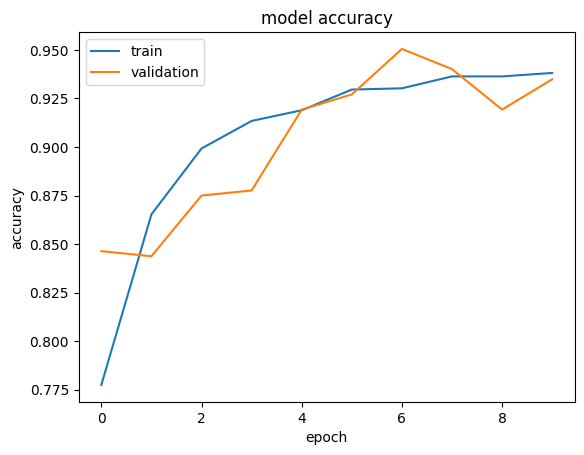

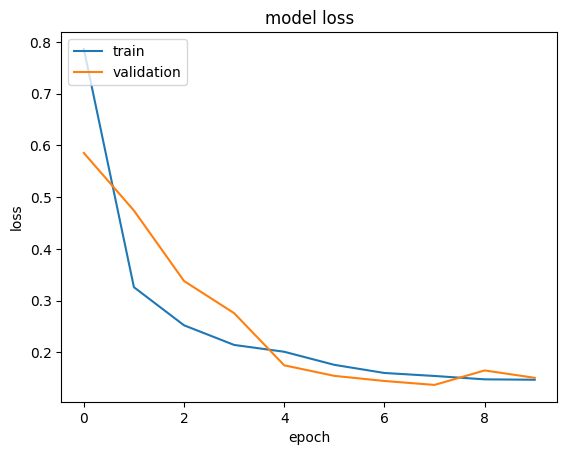

In [45]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()